In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [5]:
ds = pd.read_csv("adult.csv")
ds.replace('?', np.nan, inplace=True)
ds.dropna(inplace=True)

In [6]:
x=ds.iloc[:,:-1].values
y=ds.iloc[:,-1].values

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
x_train[:, 1:]=imputer.fit_transform(x_train[:,1:]) 

In [9]:
from sklearn.preprocessing import LabelEncoder

ordinal_categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13]

label_encoders = []
for col_index in ordinal_categorical_columns:
    le = LabelEncoder()
    x_train[:, col_index] = le.fit_transform(x_train[:, col_index])
    x_test[:, col_index] = le.transform(x_test[:, col_index])
    label_encoders.append(le)


In [10]:
from sklearn.preprocessing import LabelEncoder
lb_obj= LabelEncoder() 
y_train=lb_obj.fit_transform(y_train)
y_test=lb_obj.transform(y_test)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # or StandardScaler
x_train_StandardScaled = scaler.fit_transform(x_train)
x_test_StandardScaled = scaler.transform(x_test)


In [12]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=20, max_features="sqrt", random_state=0) 
classifier.fit(x_train_StandardScaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=10,
                       random_state=0)

In [13]:
print(classifier.predict([[0.177807, 0.088108,0.173244,1.218035,-0.036491,-0.407250,1.289114,-0.898177,0.394225,0.698654,-0.144749,-0.21852,0.851632,0.292299]]))

[1]


In [14]:
y_pred = classifier.predict(x_test_StandardScaled)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [0 0]
 ...
 [0 0]
 [1 0]
 [1 0]]


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8526437924747223

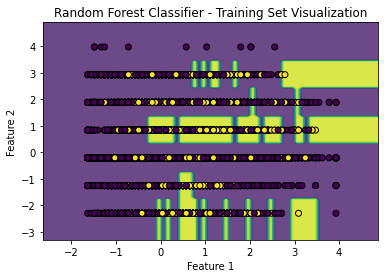

In [16]:
# Extracting only the first two columns for visualization
x_train_subset = x_train_StandardScaled[:, :2]

# Fitting the Random Forest Classifier on the subset
classifier.fit(x_train_subset, y_train)

# Creating a meshgrid for the decision boundary
x_min, x_max = x_train_subset[:, 0].min() - 1, x_train_subset[:, 0].max() + 1
y_min, y_max = x_train_subset[:, 1].min() - 1, x_train_subset[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(x_train_subset[:, 0], x_train_subset[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Random Forest Classifier - Training Set Visualization')
plt.show()


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
grid = {
    'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]
}

# Initialize the GridSearchCV
gs = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=grid,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

# Fit the grid search on your training data
gs.fit(x_train_StandardScaled, y_train)

# Get the best accuracy using the best_score_ attribute of the grid search object
best_accuracy = gs.best_score_

# Get the best parameters corresponding to this accuracy
best_parameters = gs.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

# Re-train the model with the best parameters
best_rf = RandomForestClassifier(**best_parameters)
best_rf.fit(x_train_StandardScaled, y_train)

# Predict on the test set with the best model
y_pred_best = best_rf.predict(x_test_StandardScaled)

# Calculate and print accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred_best)
print("Test Set Accuracy with Best Model:", test_accuracy)


Best Accuracy: 0.853619971698353
Best Parameters: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 90, 'random_state': 0}
Test Set Accuracy with Best Model: 0.8468423669816012


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter distribution for RandomizedSearchCV
param = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=200, num=20)],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(start=2, stop=20, num=10)],
    'criterion': ['gini', 'entropy'],
    'random_state': [0]
}

# Initialize the RandomizedSearchCV
rs = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param,
    n_iter=50,
    random_state=0,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

# Fit the randomized search on your training data
rs.fit(x_train_StandardScaled, y_train)

# Get the best accuracy using the best_score_ attribute of the randomized search object
best_accuracy = rs.best_score_

# Get the best parameters corresponding to this accuracy
best_parameters = rs.best_params_

print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)

# Re-train the model with the best parameters
best_rf_rs = RandomForestClassifier(**best_parameters)
best_rf_rs.fit(x_train_StandardScaled, y_train)

# Predict on the test set with the best model
y_pred_best_rs = best_rf_rs.predict(x_test_StandardScaled)

# Calculate and print accuracy on the test set
test_accuracy_rs = accuracy_score(y_test, y_pred_best_rs)
print("Test Set Accuracy with Best Model (Randomized Search):", test_accuracy_rs)


Best Accuracy: 0.8629032280234412
Best Parameters: {'random_state': 0, 'n_estimators': 150, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Test Set Accuracy with Best Model (Randomized Search): 0.8582794629537543


In [19]:
model= RandomForestClassifier(criterion='entropy', max_depth = 4, max_features='sqrt', n_estimators= 20, random_state=0)
model.fit(x_train_StandardScaled,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=20,
                       random_state=0)

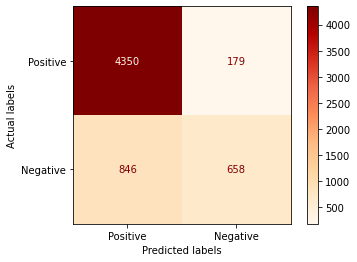

Accuracy: 0.8301011105585944
Recall: 0.4375
Precision: 0.7861409796893668
F1-score: 0.5621529260999573
AUC: 0.885961422370257


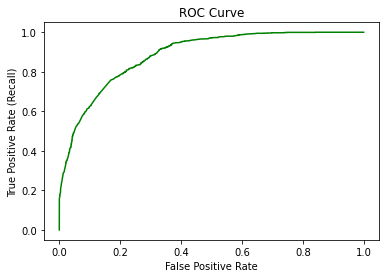

In [20]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set using the model created with specific hyperparameters
y_pred = model.predict(x_test_StandardScaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap=plt.cm.OrRd)
plt.xlabel("Predicted labels")
plt.ylabel("Actual labels")
plt.show()

# Calculate and print the performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, pos_label=1))  # Assuming 1 is your positive label
print("Precision:", precision_score(y_test, y_pred, pos_label=1))  # Assuming 1 is your positive label
print("F1-score:", f1_score(y_test, y_pred, pos_label=1))  # Assuming 1 is your positive label

# Plotting the ROC curve and calculating the AUC
y_pred_prob = model.predict_proba(x_test_StandardScaled)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=1)  # Assuming 1 is your positive label
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

# Plot ROC curve
plt.plot(fpr, tpr, color='green')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.show()


In [21]:
# Confirming the results from the confusion matrix
accuracy=(4350+658)/(4350+658+179+846)
recall= (658)/(658+846)
precision = (658)/(658+179)
print("Accuracy : ", accuracy )
print("Recall : ",recall)
print("Precision: ", precision)
print("F1-score: ", 2*(precision*recall/(precision+recall)))

Accuracy :  0.8301011105585944
Recall :  0.4375
Precision:  0.7861409796893668
F1-score:  0.5621529260999573
